# Bootleg Macro Testing Ground :dog: :cat: :bird: :eggplant:

## Explore various functionalities here.

### Searching for asset ticker symbols and building watchlists.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.available
plt.style.use('seaborn-v0_8')
plt.rcParams["font.family"] = "serif"
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
#%load_ext autoreload
%autoreload 2
plt.rcParams["backend"] = "QtAgg"
plt.rcParams["figure.dpi"] = 350
plt.rcParams["figure.figsize"] = (12, 5)
wd = %pwd
import os
fdel = os.path.sep

from MacroBackend import Utilities, PriceImporter, Pull_Data, Charting, Fitting
import datetime
import ipywidgets as widgets
from IPython.display import display, HTML, Image, Markdown, clear_output

keys = Utilities.api_keys()
print(keys.keys)
myFredAPI_key = keys.keys['fred']
DataStart = "2021-01-01"
EndDateStr = datetime.date.today().strftime("%Y-%m-%d")


/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend /Users/jamesbishop/Documents/Python/Bootleg_Macro
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
{'fred': 'f632119c4e0599a3229fec5a9ac83b1c', 'glassnode': '2RpkhVDN1GXAgTNG23u9lhHQCJL', 'bea': '779F26DA-1DB0-4CC2-94DD-2AE3492DA4FC', 'quandl': 'ChHHNTWkY4rb3aYoYepw'}


In [6]:
equIndexes = pd.HDFStore('/Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/Watchlists/EquityIndexes/EquityIndexes.h5s', mode = 'r')
equIndexList = equIndexes.keys()
abs_index = pd.read_csv("/Users/jamesbishop/Documents/Python/Bootleg_Macro/User_Data/ABS/ABS_Series_MasterIndex.csv", index_col=0)
# Print memory usage
print("\nMemory Usage:")
print(abs_index.memory_usage(deep=True))
print(f"Total memory usage: {abs_index.memory_usage(deep=True).sum()} bytes")
abs_index.info()


Memory Usage:
Index                      806296
Unnamed: 0                 806296
Data Item Description    13108785
Series Type               5825708
Series ID                 5905916
Series Start              5946433
Series End                5946433
No. Obs.                   806296
Unit                      5685789
Data Type                 5533741
Freq.                     5576416
Collection Month           806296
Catalogue                 9654424
Table                    13437946
dtype: int64
Total memory usage: 79846775 bytes
<class 'pandas.core.frame.DataFrame'>
Index: 100787 entries, 0 to 100786
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             100787 non-null  int64 
 1   Data Item Description  100787 non-null  object
 2   Series Type            100787 non-null  object
 3   Series ID              100787 non-null  object
 4   Series Start           100787 non-null

In [2]:
# Specify the absolute path of the image
image_path = wd+fdel+'images'+fdel+'FedNetLiquidity.png'
# This method has the advantage of beiing able to display images from any location on your computer...

# Display the image with specified width and height
display(Image(filename=image_path, width=800, height=300))

# Display the caption as Markdown
display(Markdown('**Figure 1:** Fed Net liquidity model... Using IPython.display in code cell for image insertion...'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jamesbishop/Documents/Python/Bootleg_Macro/images/FedNetLiquidity.png'

## Pull data series from the Federal Reserve Economic Database (FRED)

FRED API response:  200


<Axes: xlabel='date'>

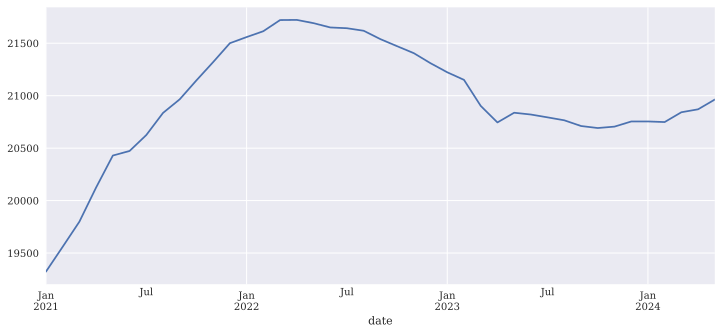

In [5]:
seriesInfo, series = PriceImporter.PullFredSeries("M2SL",myFredAPI_key,start=DataStart,end=EndDateStr,Con2Bil=True)
series.plot()

## Get Data from Yahoo Finance via python based Web scrapers.

### Earnings data, price history and more...

#### python package yahoofinancials. There are also yfinance & yahoo_fin package options.

In [2]:
from yahoofinancials import YahooFinancials as yf
import datetime
start_date = "2018-01-01"
end_date = datetime.date.today().strftime("%Y-%m-%d")
ticker = yf("TSLA")
#data = ticker.get_historical_price_data("2000-01-01", end_date, "daily")

#data
data = ticker.get_historical_price_data(start_date, end_date, "daily")
data.keys()
data["TSLA"].keys()
df = pd.DataFrame(data["TSLA"]["prices"]).set_index("formatted_date", drop=True).drop("date", axis=1)
df

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2018-01-02,21.474001,20.733334,20.799999,21.368668,65283000,21.368668
2018-01-03,21.683332,21.036667,21.400000,21.150000,67822500,21.150000
2018-01-04,21.236668,20.378668,20.858000,20.974667,149194500,20.974667
2018-01-05,21.149332,20.799999,21.108000,21.105333,68868000,21.105333
2018-01-08,22.468000,21.033333,21.066668,22.427334,147891000,22.427334
...,...,...,...,...,...,...
2024-06-18,187.199997,182.369995,186.559998,184.860001,68982300,184.860001
2024-06-20,185.210007,179.660004,184.679993,181.570007,55893100,181.570007
2024-06-21,183.949997,180.690002,182.300003,183.009995,63029500,183.009995


### Using javascript. Node package yfinance2. This allows searching of yahoo finance site. 

In [14]:
from MacroBackend import js_funcs

results = js_funcs.search_yf_tickers("AMZN")
#print(type(results), results.keys(), "\n\n", results["News"], "\n\n", results["Tickers"])
results["tickers_df"]

Success with yfinance request.


,exchange,shortname,quoteType,symbol,index,score,typeDisp,longname,exchDisp,sector,sectorDisp,industry,industryDisp,dispSecIndFlag,isYahooFinance
Result #,,,,,,,,,,,,,,,
0,NMS,"Amazon.com, Inc.",EQUITY,AMZN,quotes,3130600,Equity,"Amazon.com, Inc.",NASDAQ,Consumer Cyclical,Consumer Cyclical,Internet Retail,Internet Retail,True,True
1,MEX,AMAZON COM INC,EQUITY,AMZN.MX,quotes,20124,Equity,"Amazon.com, Inc.",Mexico,Consumer Cyclical,Consumer Cyclical,Internet Retail,Internet Retail,NaN,True
2,PCX,Tidal ETF Trust II YieldMax AMZ,ETF,AMZY,quotes,20024,ETF,YieldMax AMZN Option Income Strategy ETF,NYSEArca,NaN,NaN,NaN,NaN,NaN,True
3,NGM,Direxion Daily AMZN Bull 2X Sha,ETF,AMZU,quotes,20014,ETF,Direxion Daily AMZN Bull 2X Shares,NASDAQ,NaN,NaN,NaN,NaN,NaN,True
4,OPR,AMZN Jul 2024 180.000 call,OPTION,AMZN240719C00180000,quotes,20009,Option,AMZN Jul 2024 180.000 call,OPR,NaN,NaN,NaN,NaN,NaN,True
5,OPR,AMZN Jan 2026 205.000 call,OPTION,AMZN260116C00205000,quotes,20009,Option,AMZN Jan 2026 205.000 call,OPR,NaN,NaN,NaN,NaN,NaN,True


## RUN THIS CELL TO BRING UP THE SEARCH DATA GUI

In [7]:
######Code to run the symbol search GUI below
%gui qt
from MacroBackend import search_symbol_gui
# Declare a global variable to hold the UI dictionary
watchlist = None
 
def run_search_symbol_gui(b):
    global watchlist  # Declare the use of the global variable
    print("Running the symbol finder gui... ")
    gui = search_symbol_gui.run_app()
    watchlist = gui  # Update the global variable with the returned ui dictionary

def load_watchlist(b) -> search_symbol_gui.Watchlist:
    global watchlist  # Declare the use of the global variable
    print("Choose your cunt you fuckstick.")
    watch = search_symbol_gui.Watchlist()
    watch.load_watchlist()
    if watch["watchlist"].empty:
        print("No watchlist loaded.")
    else:
        print("Successfully loaded watchlist.")
        watchlist = watch

# Step 3: Create a Button widget
button = widgets.Button(description="Search for symbols")
button2 = widgets.Button(description="Load watchlist")
# Step 4: Define an on_click event handler
button.on_click(run_search_symbol_gui)
button2.on_click(load_watchlist)
# Step 5: Use HBox to position buttons next to each other
buttons_layout = widgets.HBox([button, button2])
display(buttons_layout)

Running the symbol finder gui... 
Icon path:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/app_icon.png <PyQt6.QtGui.QIcon object at 0x13d7b7390>
Current watchlist set to: EquityIndexes
Selected source: fred
The source value is a function...
Current watchlist set to: glassnode
Selected source: glassnode
The source is a file path...
Loading index of time-series data for source:  glassnode  to dataframe from:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Glassnode/Saved_Data/GN_MetricsList.csv
Original search terms list:  ['balance']
Row selected:  balance_exchanges
No exchange column found in selected row, adding 'N/A' to exchange column
Series addded to return dict:  balance_exchanges
Row selected:  balance_exchanges_relative
No exchange column found in selected row, adding 'N/A' to exchange column
Series addded to return dict:  balance_exchanges_relative
Row selected:  balance_exchanges_all
No exchange column found in selected row, adding 'N/A' to e

In [13]:
outputlist = pd.DataFrame(watchlist["watchlist"])
series_meta = pd.DataFrame(watchlist["metadata"])
outputlist

,id,title,source
0,price_usd_close,price_usd_close,glassnode
1,price_usd_ohlc,price_usd_ohlc,glassnode
2,price_drawdown_relative,price_drawdown_relative,glassnode
3,price_realized_usd,price_realized_usd,glassnode
4,balanced_price_usd,balanced_price_usd,glassnode
5,utxo_realized_price_distribution_percent,utxo_realized_price_distribution_percent,glassnode
6,utxo_realized_price_distribution_ath,utxo_realized_price_distribution_ath,glassnode
7,spent_output_price_distribution_percent,spent_output_price_distribution_percent,glassnode
8,spent_output_price_distribution_ath,spent_output_price_distribution_ath,glassnode
9,gas_price_median,gas_price_median,glassnode


# Pull data from a range of sources using my Pull_Data.dataset class.
### Print list of sources which you can pull from that have been implemented thus far, using: 
```
some_data = Pull_Data.dataset()
some_data.added_sources
```
## The below example shows a template for getting data from FRED.

In [9]:
some_data = Pull_Data.dataset()
some_data.added_sources   #Show the source options...
some_data.keySources      #Show the key sources... You'll need your own api key to access these. Keys are free for FRED, BEA & ABS..
some_data.get_data(outputlist.loc[0, "source"], outputlist.loc[0, "id"], outputlist.loc[0, "observation_start"], capitalize_column_names=True)
some_data.data

Looking for api keys in SystemInfo folder... /home/imbobbilly/Documents/Coding/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  fred data code:  ASPUS
FRED API response:  200


date
1963-01-01     19300.0
1963-04-01     19400.0
1963-07-01     19200.0
1963-10-01     19600.0
1964-01-01     19600.0
                ...   
2023-01-01    505300.0
2023-04-01    503000.0
2023-07-01    521900.0
2023-10-01    498300.0
2024-01-01    513100.0
Name: ASPUS, Length: 245, dtype: float64

## Get Data from BEA
Not yet implemented into my pull_data class, you can get data tab;es from BEA using my "bea_gui.py", this is a GUI made with tkinter that has significant capabilities
for downlaoding data from the beaurea of economic analysis (BEA). This is stored in "/MacroBackend/BEA_Data/bea_data_mate".

In [ ]:
# from BEA_Data.bea_data_mate import BEA_API_backend as bea
# bea.

## GLASSNODE

In [16]:
gn_data = Pull_Data.dataset()
gn_data.get_data(outputlist.loc[0, "source"], outputlist.loc[0, "id"]+",BTC,24h", "2015-01-01", capitalize_column_names=True)
gn_data.data

Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Looking for data from source:  glassnode data code:  price_usd_close,BTC
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Getting data for GN metric,  price_usd_close , from Glassnode API.
Making request to url:  https://api.glassnode.com/v1/metrics/market/price_usd_close
Success with getting data from GlassNode API.
json format expected, reading json data into pandas dataframe....
Returning the glassnode data as a Series..


datetime
2010-07-17        0.049510
2010-07-18        0.085840
2010-07-19        0.080800
2010-07-20        0.074733
2010-07-21        0.079210
                  ...     
2024-06-27    61588.176996
2024-06-28    60301.981895
2024-06-29    60871.086844
2024-06-30    62754.310361
2024-07-01    62833.067067
Name: price_usd_close, Length: 5099, dtype: float64

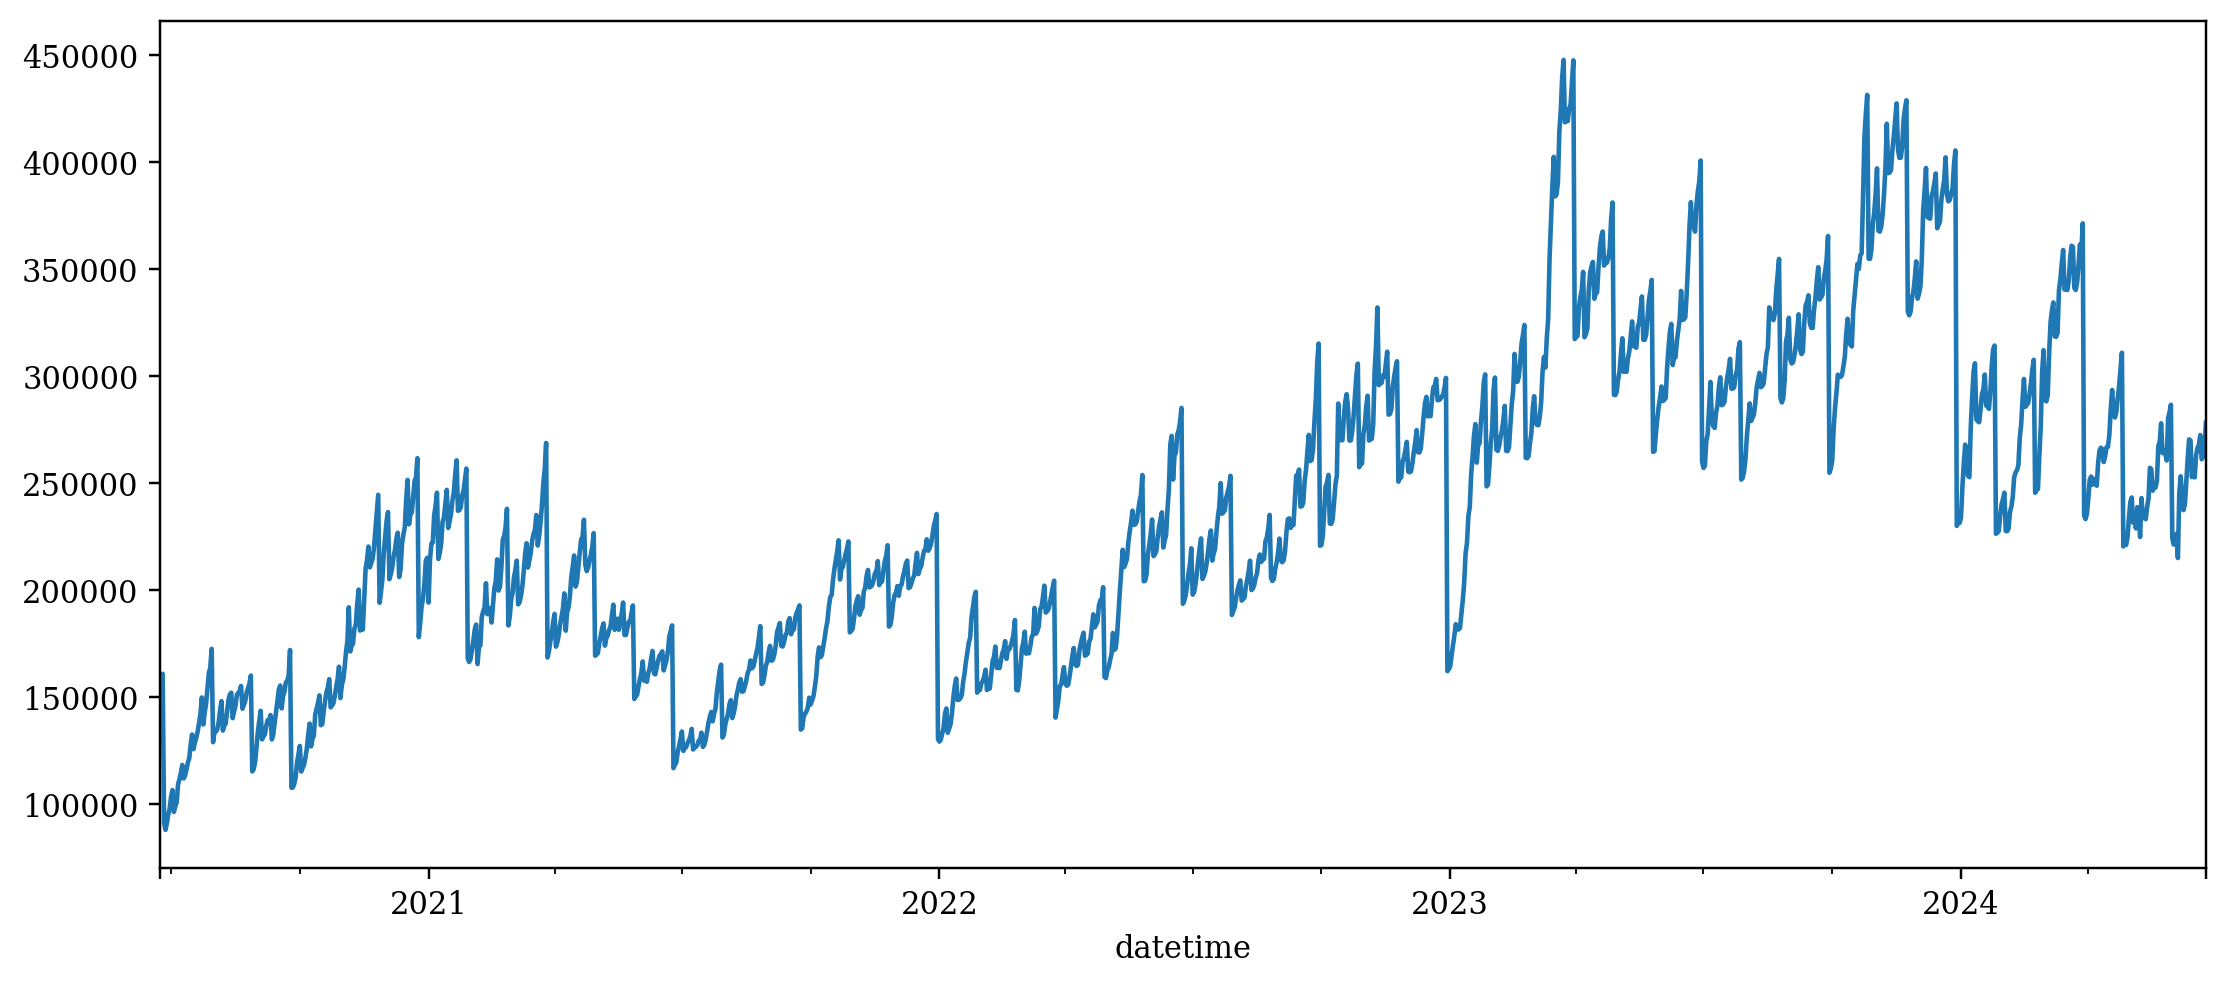

In [26]:
gn_data.data.plot()
plt.show()

##    BELOW IS AN EXAMPLE OF THE USE OF MY PEAK FINDING AND CURVE FITTING FUNCTIONS

In [ ]:
%matplotlib qt
plt.rcParams["backend"] = "QtAgg"
plt.rcParams["figure.dpi"] = 95
plt.rcParams["figure.figsize"] = (8.5, 5)
og = some_data.data.copy()
yoy = Utilities.MonthPeriodAnnGrowth2(some_data.data, 12)  # Calculate the year-over-year growth rate of the data series. 
peak_locs = Fitting.get_peak_locs(yoy, yscale = "linear", ylabel="YoY % change", title = some_data.SeriesInfo["title"])  # Get the peak locations of the data series. Returned as a list

Calculating the 12 month annualized % change for the series.
Frequency of input time series: QS-OCT
Quarter frequency period.
0
4
Ann. period =  4 quarters.
4 Q
date
1963-01-01         NaN
1963-04-01         NaN
1963-07-01         NaN
1963-10-01         NaN
1964-01-01    1.554404
                ...   
2023-01-01    1.201682
2023-04-01   -4.208722
2023-07-01    0.307515
2023-10-01   -4.357006
2024-01-01    1.543637
Name: ASPUS, Length: 245, dtype: float64
X-range points:  12
[ 22  41  62  99 147 162 199 235]
 X locs:  [Timestamp('1968-07-01 00:00:00'), Timestamp('1973-04-01 00:00:00'), Timestamp('1978-07-01 00:00:00'), Timestamp('1987-10-01 00:00:00'), Timestamp('1999-10-01 00:00:00'), Timestamp('2003-07-01 00:00:00'), Timestamp('2012-10-01 00:00:00'), Timestamp('2021-10-01 00:00:00')]


/home/imbobbilly/miniconda3/envs/bm/lib/python3.11/site-packages/ipykernel/eventloops.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  el.exec() if hasattr(el, "exec") else el.exec_()


[Timestamp('1968-07-01 00:00:00'), Timestamp('1973-04-01 00:00:00'), Timestamp('1978-07-01 00:00:00'), Timestamp('1987-10-01 00:00:00'), Timestamp('1999-10-01 00:00:00'), Timestamp('2003-07-01 00:00:00'), Timestamp('2012-10-01 00:00:00'), Timestamp('2021-10-01 00:00:00'), datetime.datetime(1991, 10, 25, 16, 47, 52, 271914, tzinfo=datetime.timezone.utc)]


/home/imbobbilly/Documents/Coding/Bootleg_Macro/MacroBackend/Fitting.py:419: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.draw()


[Timestamp('1968-07-01 00:00:00'), Timestamp('1973-04-01 00:00:00'), Timestamp('1978-07-01 00:00:00'), Timestamp('1987-10-01 00:00:00'), Timestamp('1999-10-01 00:00:00'), Timestamp('2003-07-01 00:00:00'), Timestamp('2012-10-01 00:00:00'), Timestamp('2021-10-01 00:00:00'), datetime.datetime(1991, 10, 25, 16, 47, 52, 271914, tzinfo=datetime.timezone.utc), datetime.datetime(2008, 9, 19, 6, 54, 50, 537614, tzinfo=datetime.timezone.utc)]
[Timestamp('1968-07-01 00:00:00'), Timestamp('1973-04-01 00:00:00'), Timestamp('1978-07-01 00:00:00'), Timestamp('1987-10-01 00:00:00'), Timestamp('1999-10-01 00:00:00'), Timestamp('2003-07-01 00:00:00'), Timestamp('2012-10-01 00:00:00'), Timestamp('2021-10-01 00:00:00'), datetime.datetime(1991, 10, 25, 16, 47, 52, 271914, tzinfo=datetime.timezone.utc), datetime.datetime(2008, 9, 19, 6, 54, 50, 537614, tzinfo=datetime.timezone.utc), datetime.datetime(1970, 7, 2, 14, 58, 3, 61859, tzinfo=datetime.timezone.utc)]
[Timestamp('1968-07-01 00:00:00'), Timestamp('1

In [13]:
import plotly.express as px       ##Using plotly rather than matplotlib here...

fig = px.line(og, x=og.index, y = og, title=some_data.SeriesInfo["title"],
              labels={"index": "Date", "y": some_data.SeriesInfo["units_short"]})
fig.update_yaxes(type='log')
fig2 = px.line(yoy, x=yoy.index, y = yoy, title="YoY % change in " + some_data.SeriesInfo["title"],
              labels={"index": "Date", "y": "YoY % change"})
# Adding vertical lines at the specified dates
for date in peak_locs:
    fig2.add_vline(x=date, line_width=1, line_dash="dash", line_color="red")

# Show the figure
fig.show()
fig2.show()

In [8]:
funct_options = Fitting.FitFunction().functions   #print list of fit function options..
funct_options
fitted = Fitting.FitTrend(og)
fitted.FitData(FitFunc="Exponential", x1 = "2009-01-01", x2 = "2024-04-01")
#fitted.fit
fitted_data = pd.DataFrame(pd.concat([og, fitted.fit], axis=1))
#fitted.ShowFit()
# Convert the DataFrame from wide to long format
long_df = fitted_data.reset_index().melt(id_vars='date', var_name='Variable', value_name='Value')
long_df
# Plot using Plotly Express
fig = px.line(long_df, x='date', y='Value', color='Variable', 
              title=some_data.SeriesInfo["title"],
              labels={'index': 'Date', 'Value': some_data.SeriesInfo["units_short"]})
fig.update_yaxes(type='log').update_xaxes(rangeslider_visible=True)
# Show the figure
fig.show()

Data fitting engine, fit function options are:  ['Linear', 'Exp_Base10', 'Exponential', 'ExpLog', 'LinExpLog', 'Logistic']
Frequency determination function for series:  POPTOTUSA647NWDB  frequency:  YS-JAN
Could not match the frequency for input series,  POPTOTUSA647NWDB  reported frequency is:  YS


/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/Utilities.py:249: SyntaxWarning:

invalid escape sequence '\{'



KeyError: 'YS'

## CoinGecko get names of :poop:coins & price data

In [7]:
# all_shits = PriceImporter.GetFullListofCoinsCG()
# print(len(all_shits))

14773


In [8]:
# search_shits = Utilities.Search_DF(all_shits, "shit")
# search_shits
# all_shits.to_csv(wd+fdel+"MacroBackend"+fdel+"AllCG.csv")

Original search terms list:  ['shit']


### Explore different matplotliob pre-set chart styles using the pandas shorthand method

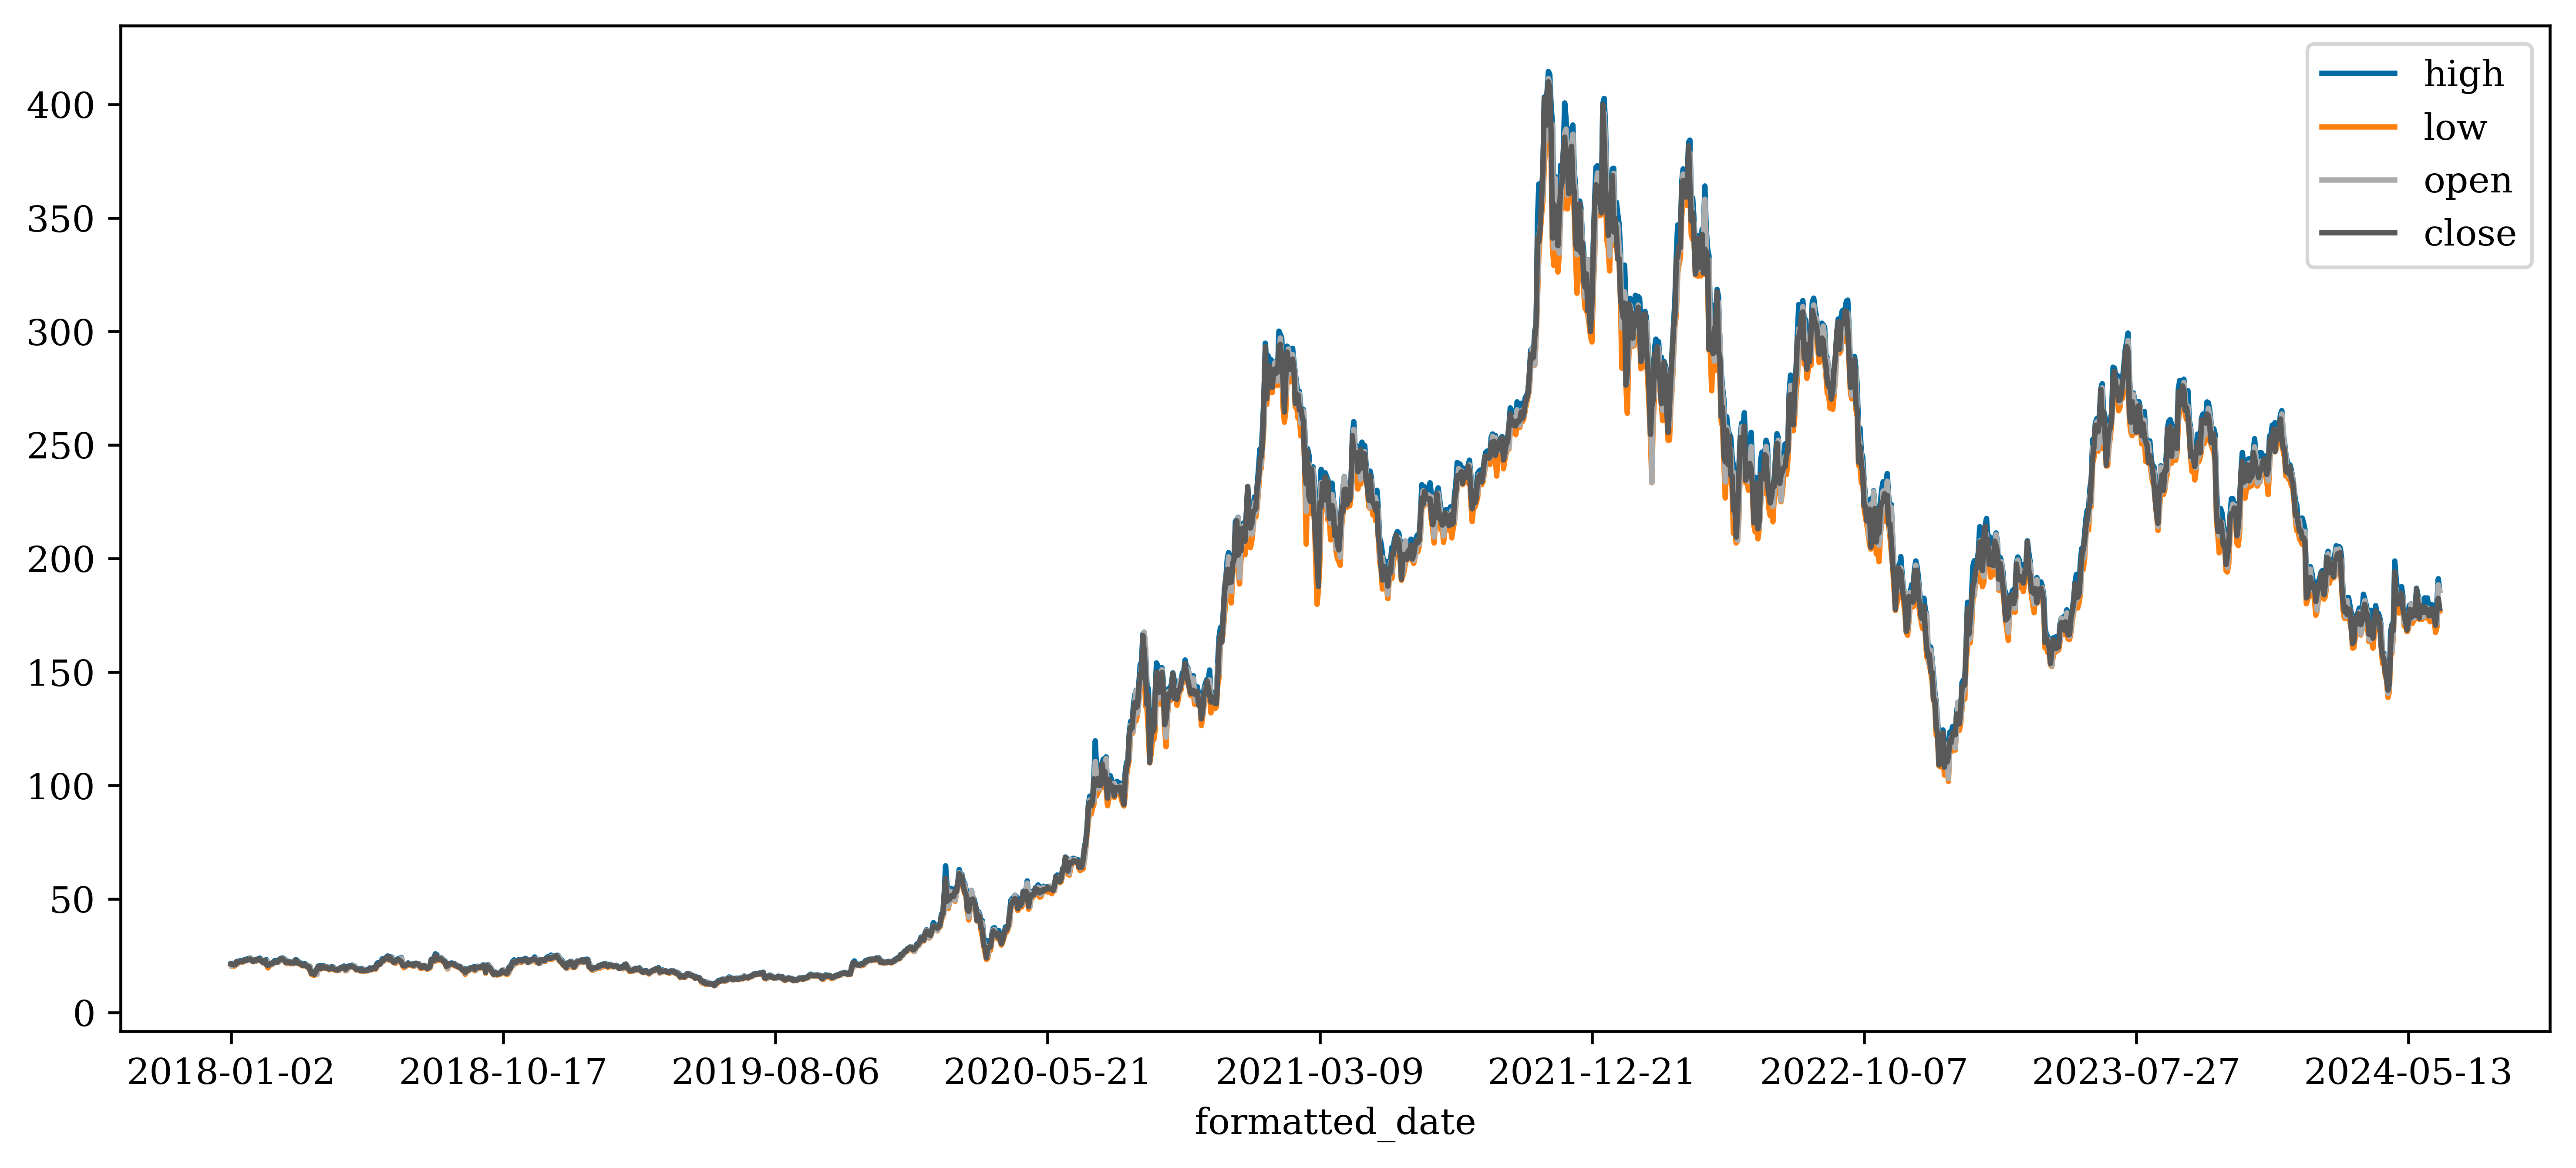

In [8]:
# In [3]: print(plt.style.available)
plt_styles = ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 
 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 
 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 
 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

# Use seaborn style
plt.style.use("tableau-colorblind10")

df[df.columns[0:4]].plot()
%matplotlib inline
plt.show()

In [10]:
print("Getting US budget deficit data from FRED.")
def_start_date = "1990-01-01"
deficit_info, deficit = PriceImporter.PullFredSeries("MTSDS133FMS",myFredAPI_key,start=def_start_date,end=EndDateStr,Con2Bil=True)
last_date = deficit.index[-1]  # get the last date which is a month start
last_day_of_month = last_date + pd.offsets.MonthEnd(1)  # get the last day of that month
Findex = pd.date_range(def_start_date,last_day_of_month,freq='D')
deficit

Getting US budget deficit data from FRED.
FRED API response:  200


date
1990-01-01      8.282000
1990-02-01    -35.207000
1990-03-01    -53.324000
1990-04-01     41.829000
1990-05-01    -42.482000
                 ...    
2024-01-01    -21.930356
2024-02-01   -296.274648
2024-03-01   -236.456824
2024-04-01    209.529307
2024-05-01   -347.130894
Name: MTSDS133FMS, Length: 413, dtype: float64

In [11]:

last_value = pd.Series([deficit.iloc[-1]], index=[deficit.index[-1] + pd.offsets.MonthEnd(1)])
deficit = pd.concat([deficit, last_value])
# deficit
# # Resample to daily frequency
deficit_d = deficit.resample('D').ffill()
# ddf = pd.concat([deficit_d, deficit_de], axis=1, keys=["month_end", "shifted"])
# deficit_d.plot()
# plt.show()
deficit_d.tail(40)

# deficit_ds = deficit_d.groupby(deficit_d.index.to_period('M')).transform(lambda x: x / len(x))
# deficit_cs = deficit_d.cumsum()

2024-04-22    209.529307
2024-04-23    209.529307
2024-04-24    209.529307
2024-04-25    209.529307
2024-04-26    209.529307
2024-04-27    209.529307
2024-04-28    209.529307
2024-04-29    209.529307
2024-04-30    209.529307
2024-05-01   -347.130894
2024-05-02   -347.130894
2024-05-03   -347.130894
2024-05-04   -347.130894
2024-05-05   -347.130894
2024-05-06   -347.130894
2024-05-07   -347.130894
2024-05-08   -347.130894
2024-05-09   -347.130894
2024-05-10   -347.130894
2024-05-11   -347.130894
2024-05-12   -347.130894
2024-05-13   -347.130894
2024-05-14   -347.130894
2024-05-15   -347.130894
2024-05-16   -347.130894
2024-05-17   -347.130894
2024-05-18   -347.130894
2024-05-19   -347.130894
2024-05-20   -347.130894
2024-05-21   -347.130894
2024-05-22   -347.130894
2024-05-23   -347.130894
2024-05-24   -347.130894
2024-05-25   -347.130894
2024-05-26   -347.130894
2024-05-27   -347.130894
2024-05-28   -347.130894
2024-05-29   -347.130894
2024-05-30   -347.130894
2024-05-31   -347.130894


In [12]:
deficit_ds = deficit_d.groupby(deficit_d.index.to_period('M')).transform(lambda x: x / len(x))
deficit_cs = deficit_d.cumsum()
deficit_ds

1990-01-01     0.267161
1990-01-02     0.267161
1990-01-03     0.267161
1990-01-04     0.267161
1990-01-05     0.267161
                ...    
2024-05-27   -11.197771
2024-05-28   -11.197771
2024-05-29   -11.197771
2024-05-30   -11.197771
2024-05-31   -11.197771
Freq: D, Length: 12570, dtype: float64

In [24]:
#Resample to start of each month and forward fill
deficit_d = deficit.resample('MS').last()
# Resample to daily frequency
deficit_d = deficit_d.resample('D').ffill()
deficit_d.bfill(inplace=True)
deficit_d
# # Divide each month's data by the number of days in that month
# deficit_d = PriceImporter.ReSampleToRefIndex(deficit_d,Findex,'D') 
# deficit_d = deficit_d.groupby(deficit_d.index.to_period('M')).transform(lambda x: x / len(x))
deficit_cs = deficit_d.cumsum()
deficit_df = pd.concat([deficit_d,deficit_cs],axis=1)
deficit_df.columns = ['Monthly','Cumulative']
deficit_df

,Monthly,Cumulative
date,,
1990-01-01,8.282000,8.282000
1990-01-02,8.282000,16.564000
1990-01-03,8.282000,24.846000
1990-01-04,8.282000,33.128000
1990-01-05,8.282000,41.410000
...,...,...
2024-04-27,209.529307,-685130.155777
2024-04-28,209.529307,-684920.626470
2024-04-29,209.529307,-684711.097164


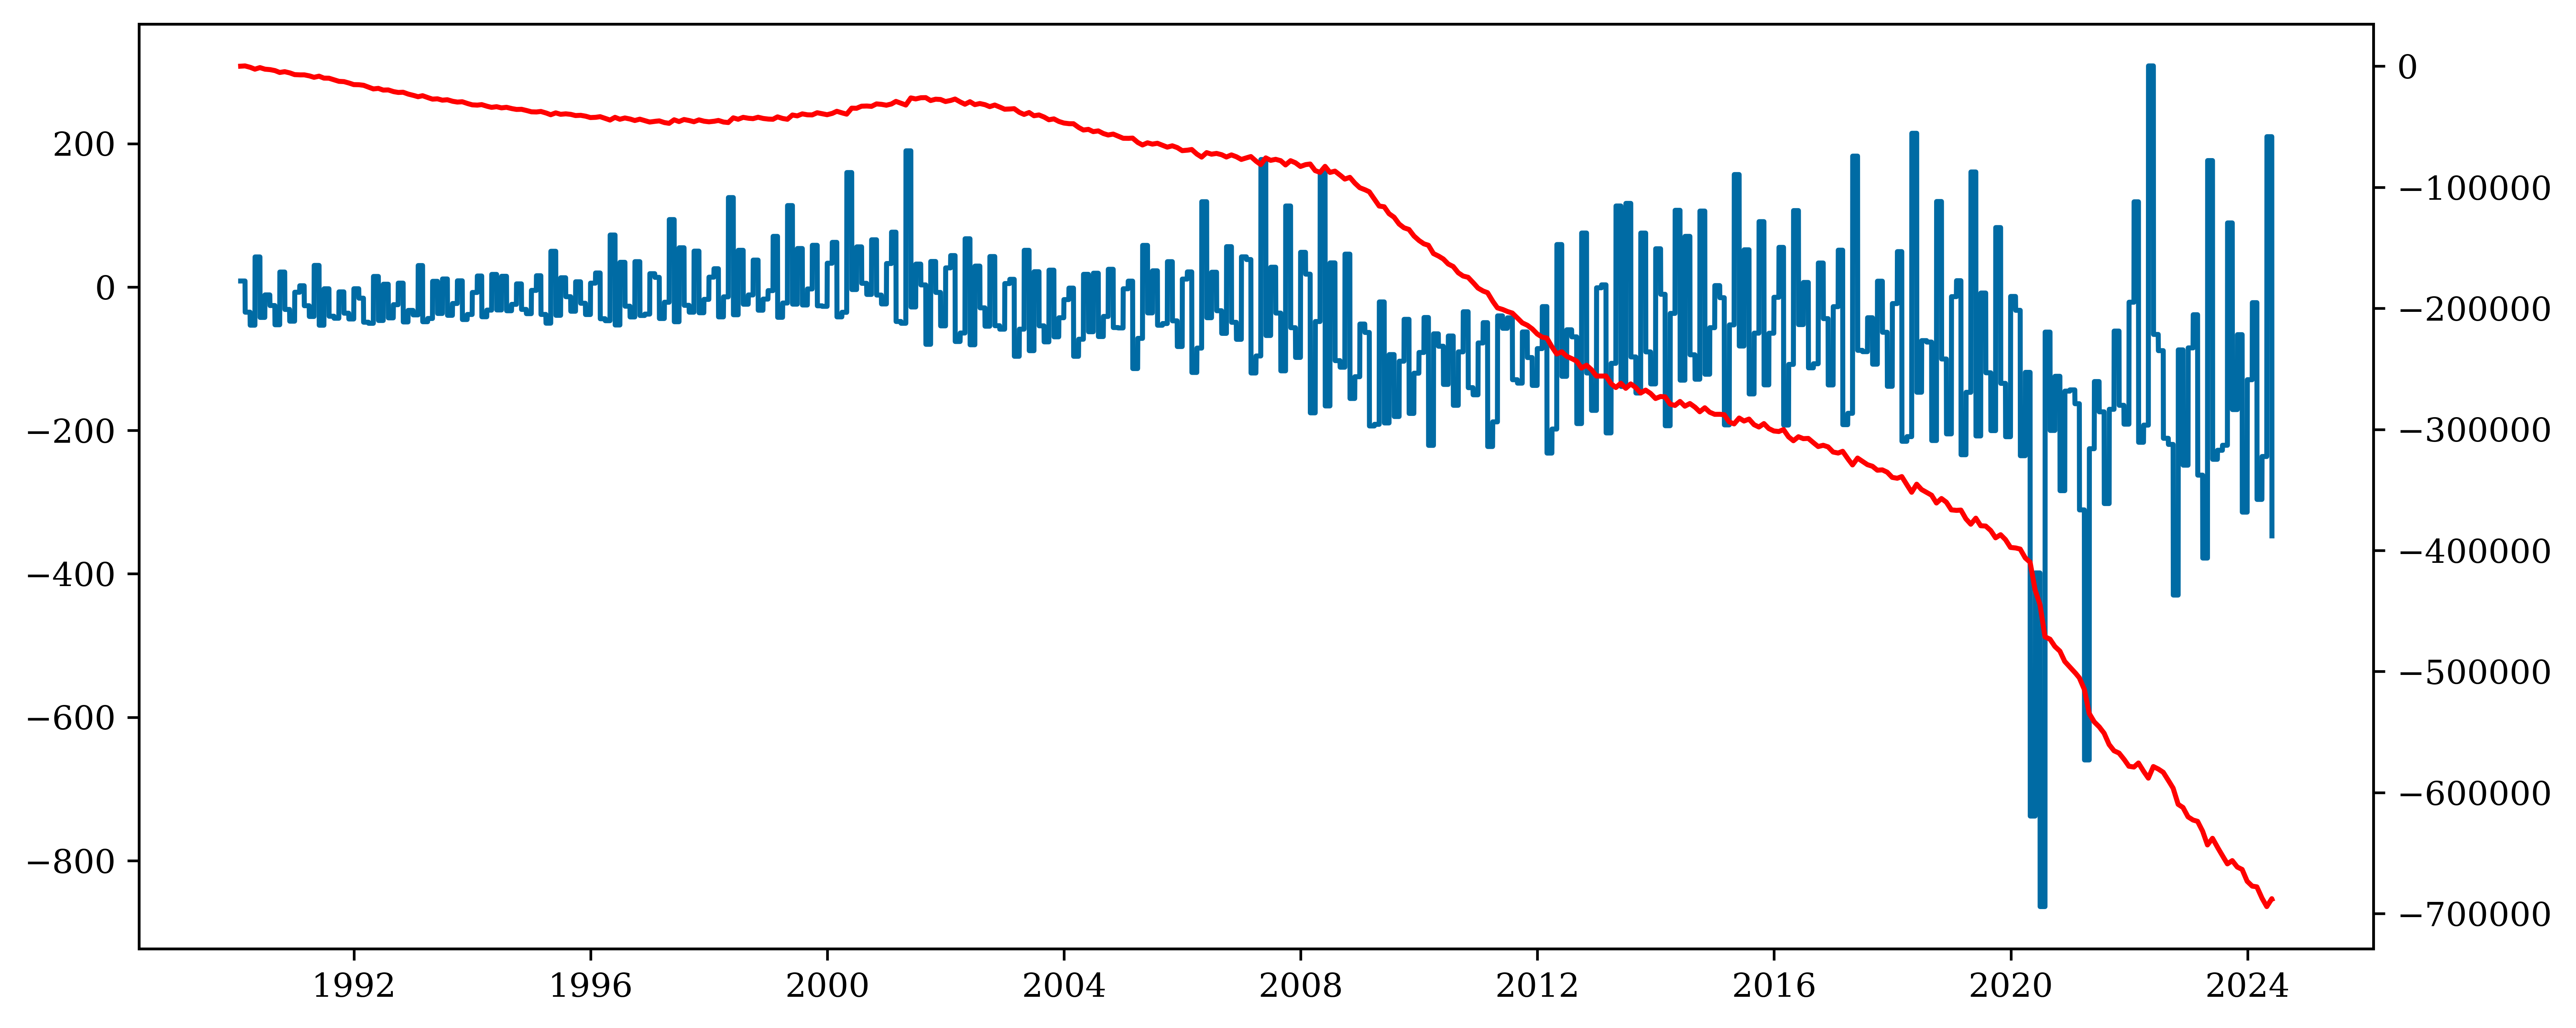

In [20]:
plt.plot(deficit_d, label="Monthly deficit daily resample")
ax2 = plt.twinx()
ax2.plot(deficit_cs, label="Cumulative deficit daily resample", color="red")
plt.show()
# #NetLiquidity3 -= deficit_d

### MATPLOTLIB STANDARD COLOR CHOICES

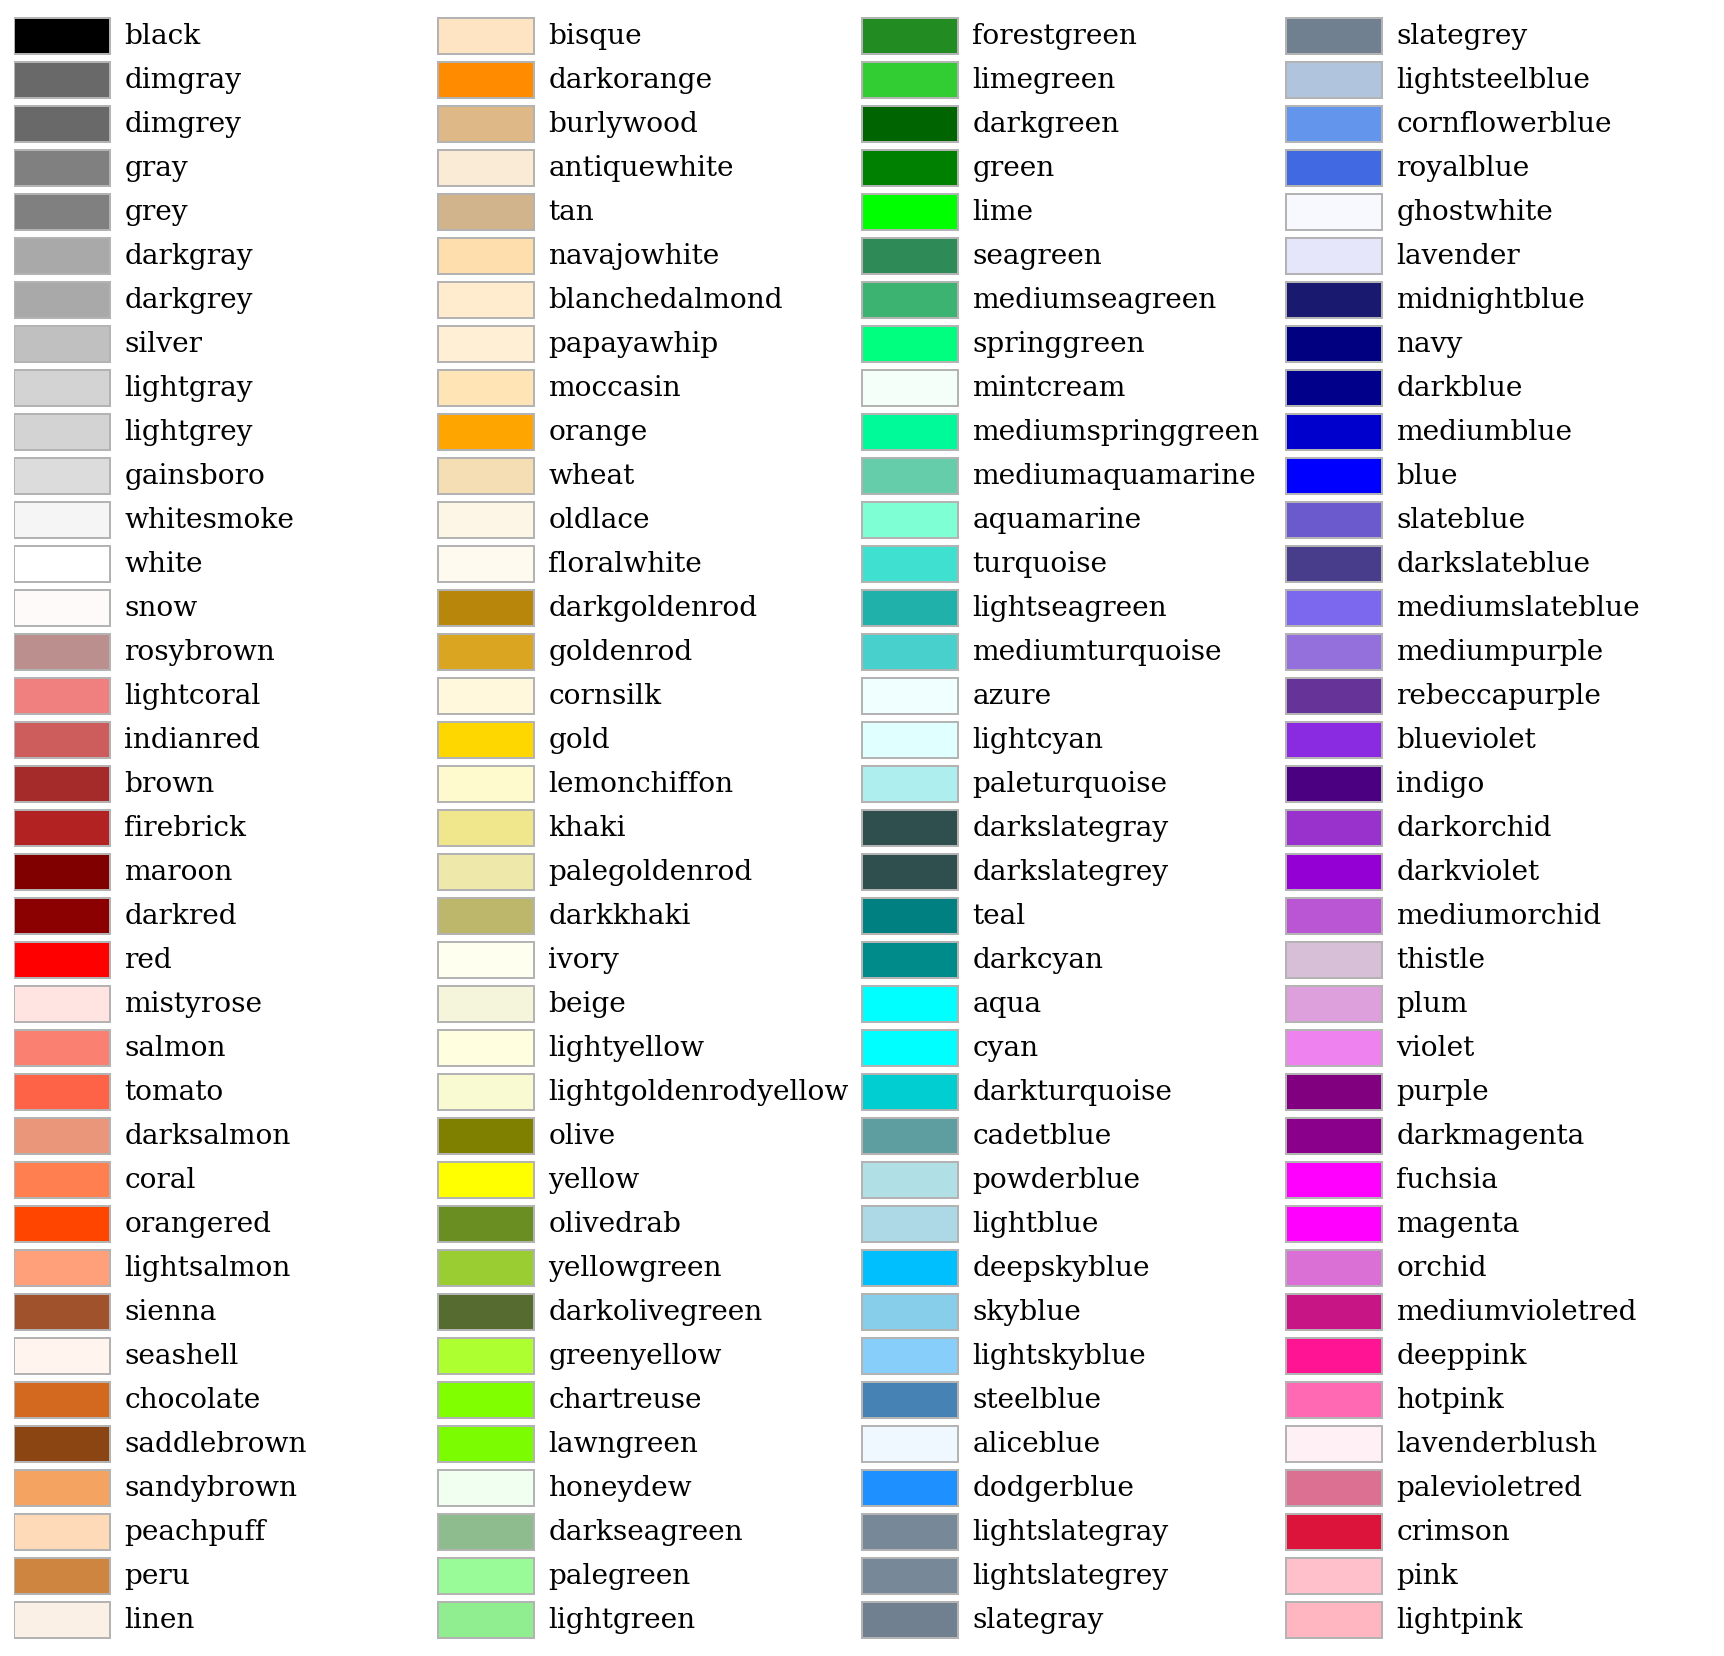

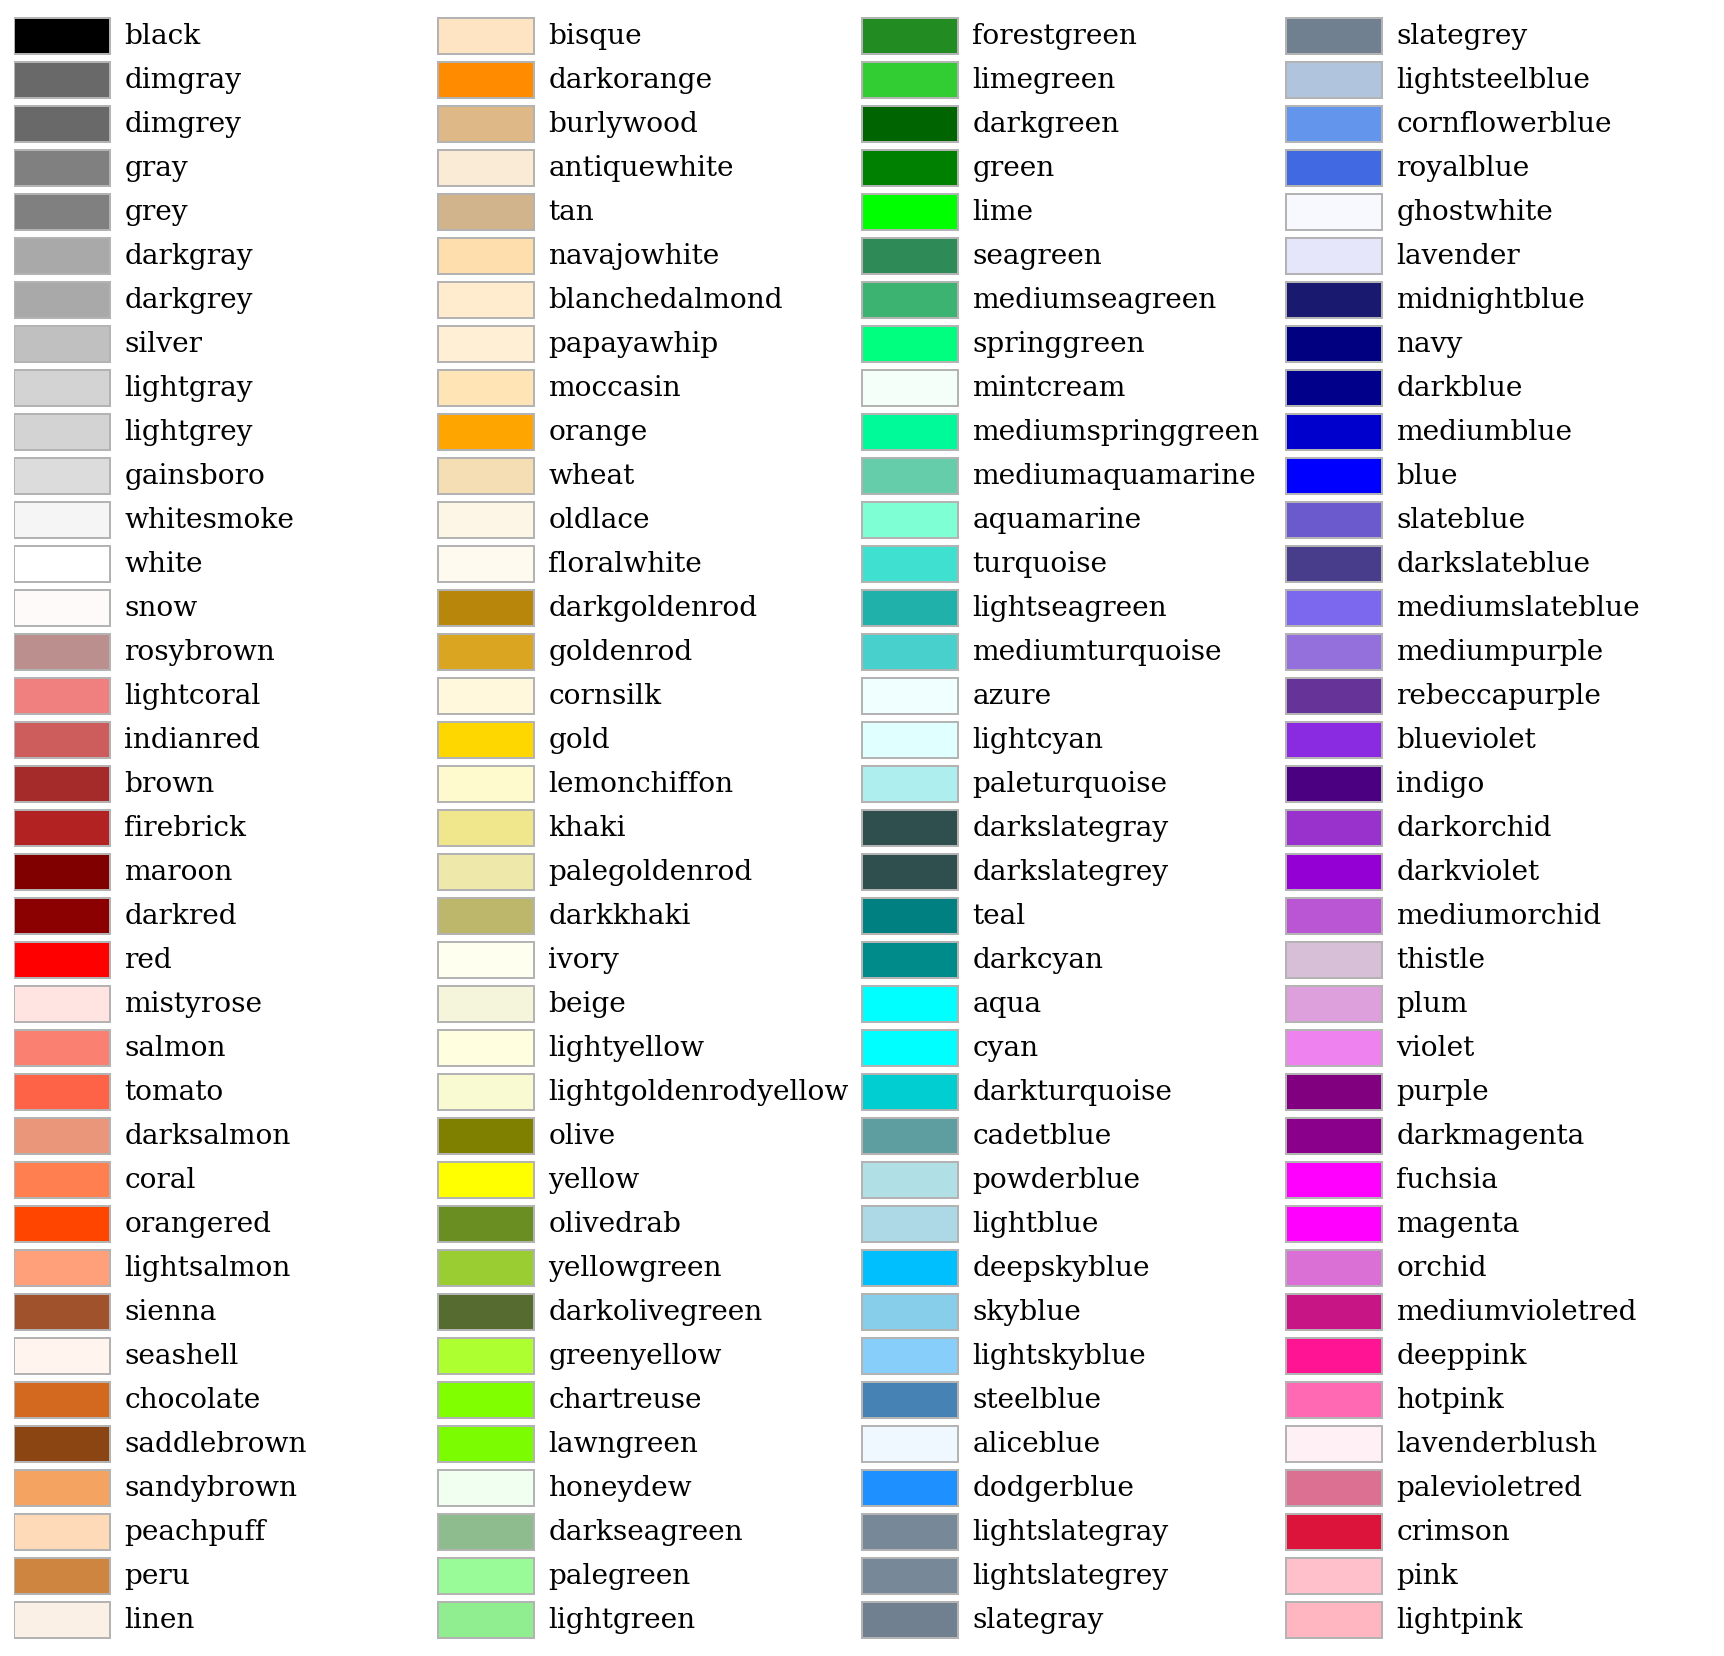

In [12]:
Charting.plot_colortable()

## NASDAQ DATA LINK
Haven't been able to do anything good with this, fuck nasdaq.

In [13]:
import nasdaqdatalink as ndl
import quandl
keys = Utilities.api_keys().keys
keys

db_list = quandl.Database.all()
# os.environ["NASDAQ_DATA_LINK_API_KEY"] = keys["quandl"]
# db_list = ndl.Database.all()
# db_list

ModuleNotFoundError: No module named 'nasdaqdatalink'

In [2]:
import beaapiloc

In [6]:
bea_key = keys.keys['bea']
beaapiloc_datapath = wd+fdel+"User_Data"+fdel+"BEA"+fdel+"beaapiloc_data"
search = beaapiloc.search_metadata("GDP", userid = bea_key, metadata_store = beaapiloc_datapath, fuzzy = True)

Created directory: beaapi_data
Creating first-time local copy of metadata for all datasets - only done once in working directory.
Datasets will be updated only if timestamps indicate metadata obsolete in future searches, and only obsolete metadata sets will be updated.


In [7]:
search

,SeriesCode,RowNumber,LineDescription,LineNumber,ParentLineNumber,Tier,Path,TableId,Datasetname,TableName,ReleaseDate,NextReleaseDate,SearchScore
0,A191RL,110,GDP,9,,0,9,U90300,NIUnderlyingDetail,Table 9.3U. Gross Domestic Product and Final S...,Jul 31 2018 8:30AM,Jan 1 1900 12:00AM,1.38
1,A191RL,110,GDP,9,,0,9,U90300,NIPA,Table 9.3U. Gross Domestic Product and Final S...,Jul 31 2018 8:30AM,Jan 1 1900 12:00AM,1.38
2,DGDSRC,30,Goods,3,2,2,1.2.3,T10105,NIPA,Table 1.1.5. Gross Domestic Product,Feb 28 2019 8:30AM,Mar 28 2019 8:30AM,1.14
3,i3gtotl1stnr,120,Structures,12,,0,12,FAAt105,FixedAssets,Table 1.5. Investment in Fixed Assets and Cons...,Nov 20 2018 12:00AM,Jan 1 1900 12:00AM,1.14
4,DGDSRC,30,Goods,3,2,2,1.2.3,T10105,NIUnderlyingDetail,Table 1.1.5. Gross Domestic Product,Feb 28 2019 8:30AM,Mar 28 2019 8:30AM,1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43589,A2211C,190,Life insurance,18,0,0,18,T70800,NIUnderlyingDetail,Table 7.8. Supplements to Wages and Salaries b...,Jul 31 2018 8:30AM,Jan 1 1900 12:00AM,0.29
43590,A4146BC,460,Communication,46,37,4,1.2.3.37.46,T60300B,NIPA,Table 6.3B. Wages and Salaries by Industry,Jul 31 2018 8:30AM,Jan 1 1900 12:00AM,0.29
43591,B424RC,40,"Agriculture, forestry, and fishing",4,3,3,1.2.3.4,T60100C,NIUnderlyingDetail,Table 6.1C. National Income Without Capital Co...,Jul 27 2018 8:30AM,Jan 1 1900 12:00AM,0.29
43592,S25210,160,Temporary disability insurance,15,12,1,12.15,T70800,NIUnderlyingDetail,Table 7.8. Supplements to Wages and Salaries b...,Jul 31 2018 8:30AM,Jan 1 1900 12:00AM,0.29
